In [1]:
# saya akan meng import bebrapa library yang akan dibutuhkan 

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [26]:
df = pd.read_csv("tweets.csv", encoding=('ISO-8859-1'))
df

,Target,ID,Date,flag,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1048570,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048571,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
1048572,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
1048573,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?


In [2]:
#kita cek apakah disini ada data yang Null

In [27]:
df.isnull().sum()

Target    0
ID        0
Date      0
flag      0
User      0
Text      0
dtype: int64

In [28]:
df['Target'].value_counts()

Target
0    799999
4    248576
Name: count, dtype: int64

In [29]:
df['Target']

0          0
1          0
2          0
3          0
4          0
          ..
1048570    4
1048571    4
1048572    4
1048573    4
1048574    4
Name: Target, Length: 1048575, dtype: int64

In [30]:
X = df['Text'].values
y = df['Target'].values

In [31]:
X

array(["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
       '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
       'my whole body feels itchy and like its on fire ', ...,
       '@ShaDeLa same here  say it like from the Terminiator movies. comes off like just 3 words. :-D',
       '@DestinyHope92 im great thaanks  wbuu?',
       'cant wait til her date this weekend '], dtype=object)

In [32]:
y

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [3]:
#dengan 0 == negatif dan 4 == positif , dan saya akan memisah data 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state= 3)

<function matplotlib.pyplot.show(close=None, block=None)>

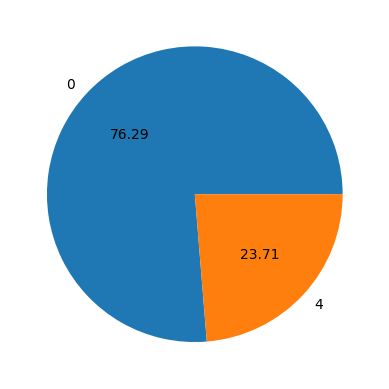

In [34]:
plt.pie(df['Target'].value_counts(), labels=['0', '4'], autopct="%0.2f",)
plt.show

In [35]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rheyn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
#kita akan memberi label pada sumbu y atau target

In [36]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y).ravel()
encoder.classes_


array([0, 4], dtype=int64)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(1048575,) (734002,) (314573,)


In [47]:
X

array(["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
       '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
       'my whole body feels itchy and like its on fire ', ...,
       '@ShaDeLa same here  say it like from the Terminiator movies. comes off like just 3 words. :-D',
       '@DestinyHope92 im great thaanks  wbuu?',
       'cant wait til her date this weekend '], dtype=object)

In [46]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [6]:
#disini saya akan mengubah text dari x menjadi angka aggar bisa digunakan ke model 

In [51]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [57]:
model = LogisticRegression(max_iter=1000)

In [58]:
print(X_train_features)

  (0, 139996)	0.5159271089354158
  (0, 213714)	0.21884345387916854
  (0, 297118)	0.42250726592313886
  (0, 196969)	0.3430603626023106
  (0, 48496)	0.2946494239551274
  (0, 347026)	0.39527317411601004
  (0, 191013)	0.3829683976521705
  (1, 263544)	0.36518035498411766
  (1, 109122)	0.4842169966077946
  (1, 338082)	0.2835466652456548
  (1, 73016)	0.5608288068197463
  (1, 308484)	0.31921406262744156
  (1, 154057)	0.3679020641691113
  (2, 335995)	0.564837314550303
  (2, 360913)	0.6228017747780725
  (2, 122410)	0.5413656411565894
  (3, 100485)	0.3233999663484836
  (3, 222800)	0.3467262222312552
  (3, 347684)	0.591325059886948
  (3, 346267)	0.32663236453831673
  (3, 222998)	0.43081276958987114
  (3, 227614)	0.254061480633894
  (3, 320689)	0.26209250692315805
  (4, 57752)	0.6698501570226744
  (4, 360426)	0.41371180803939767
  :	:
  (733998, 263544)	0.3321463857086716
  (733998, 123329)	0.2813335389259172
  (733998, 100358)	0.3949168707116682
  (733998, 89542)	0.39050245771740566
  (733998, 241

In [59]:
print(X_test_features)

  (0, 58729)	0.24343192787175272
  (0, 63778)	0.38644176593171903
  (0, 77755)	0.24901759571213924
  (0, 94820)	0.13744296055205277
  (0, 122163)	0.36185797267856395
  (0, 139080)	0.14144322035452842
  (0, 141810)	0.35236689938733107
  (0, 188398)	0.2294621366431185
  (0, 194527)	0.24525789059034775
  (0, 215879)	0.29303497060720335
  (0, 232346)	0.1701581277534988
  (0, 244802)	0.16171939721719905
  (0, 258547)	0.2574149566480409
  (0, 314312)	0.2531055019331648
  (0, 341172)	0.2264683486875556
  (1, 22228)	0.5236940534376846
  (1, 83939)	0.4642192132991345
  (1, 141717)	0.5139731122194501
  (1, 204047)	0.26370339910630375
  (1, 207054)	0.29775332234384283
  (1, 358616)	0.23830526905279492
  (1, 366440)	0.17632576495808258
  (2, 120854)	0.4130607942829379
  (2, 147734)	0.41892894938572645
  (2, 155658)	0.37186196008511124
  :	:
  (314570, 139105)	0.43096786496231465
  (314570, 159665)	0.256204428702084
  (314570, 252448)	0.3374733032981296
  (314570, 291291)	0.2698208846865098
  (3145

In [61]:
model.fit(X_train_features, y_train)

LogisticRegression(max_iter=1000)

In [62]:
prediction_train = model.predict(X_train_features)
ac_train = accuracy_score(y_train, prediction_train)
print(ac_train)

0.858343710235122


In [64]:
prediction_train = model.predict(X_test_features)
ac_train = accuracy_score(y_test, prediction_train)
print(ac_train)

0.8348427868888938


In [7]:
#bisa dilihat bahwa tingkat accuracy scorenya di 0.83 atau 83%

In [1]:
input_mail = ["heyy thats so cool mate"]
input_data = feature_extraction.transform(input_mail)
prediction = model.predict(input_data)

if (prediction[0]==0):
  print('NEGATIVE')
else:
  print('POSITIVE')
print(prediction)

NameError: name 'feature_extraction' is not defined

In [68]:
input_mail = ["Absolutely disappointed with the new [product/service]. Promised so much but delivered nothing but frustration. Waste of money and time! #Disappointed #Regret"]
input_data = feature_extraction.transform(input_mail)
prediction = model.predict(input_data)

if (prediction[0]==0):
  print('NEGATIVE')
else:
  print('POSITIVE')
print(prediction)

NEGATIVE
[0]
